In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from torchvision import datasets, transforms,models

In [3]:
# D:\Project-to-learn\Agriculture_Potato_Disease_Classification\Data\Aftermake

In [4]:
if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")
print(device)

cuda


In [5]:
print(torch.__version__)

2.9.1+cu126


In [6]:
torch.manual_seed(42)

In [7]:
transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [8]:
# Load Datasets
# 2. Load Datasets from folder
Datasets=datasets.ImageFolder(root="D:\Project-to-learn\Agriculture_Potato_Disease_Classification\Data\Aftermake", transform=transform)
# img, label = Datasets[0]

# Class names
classes = Datasets.classes
print("Classes:", classes)

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [9]:
len(classes)

12

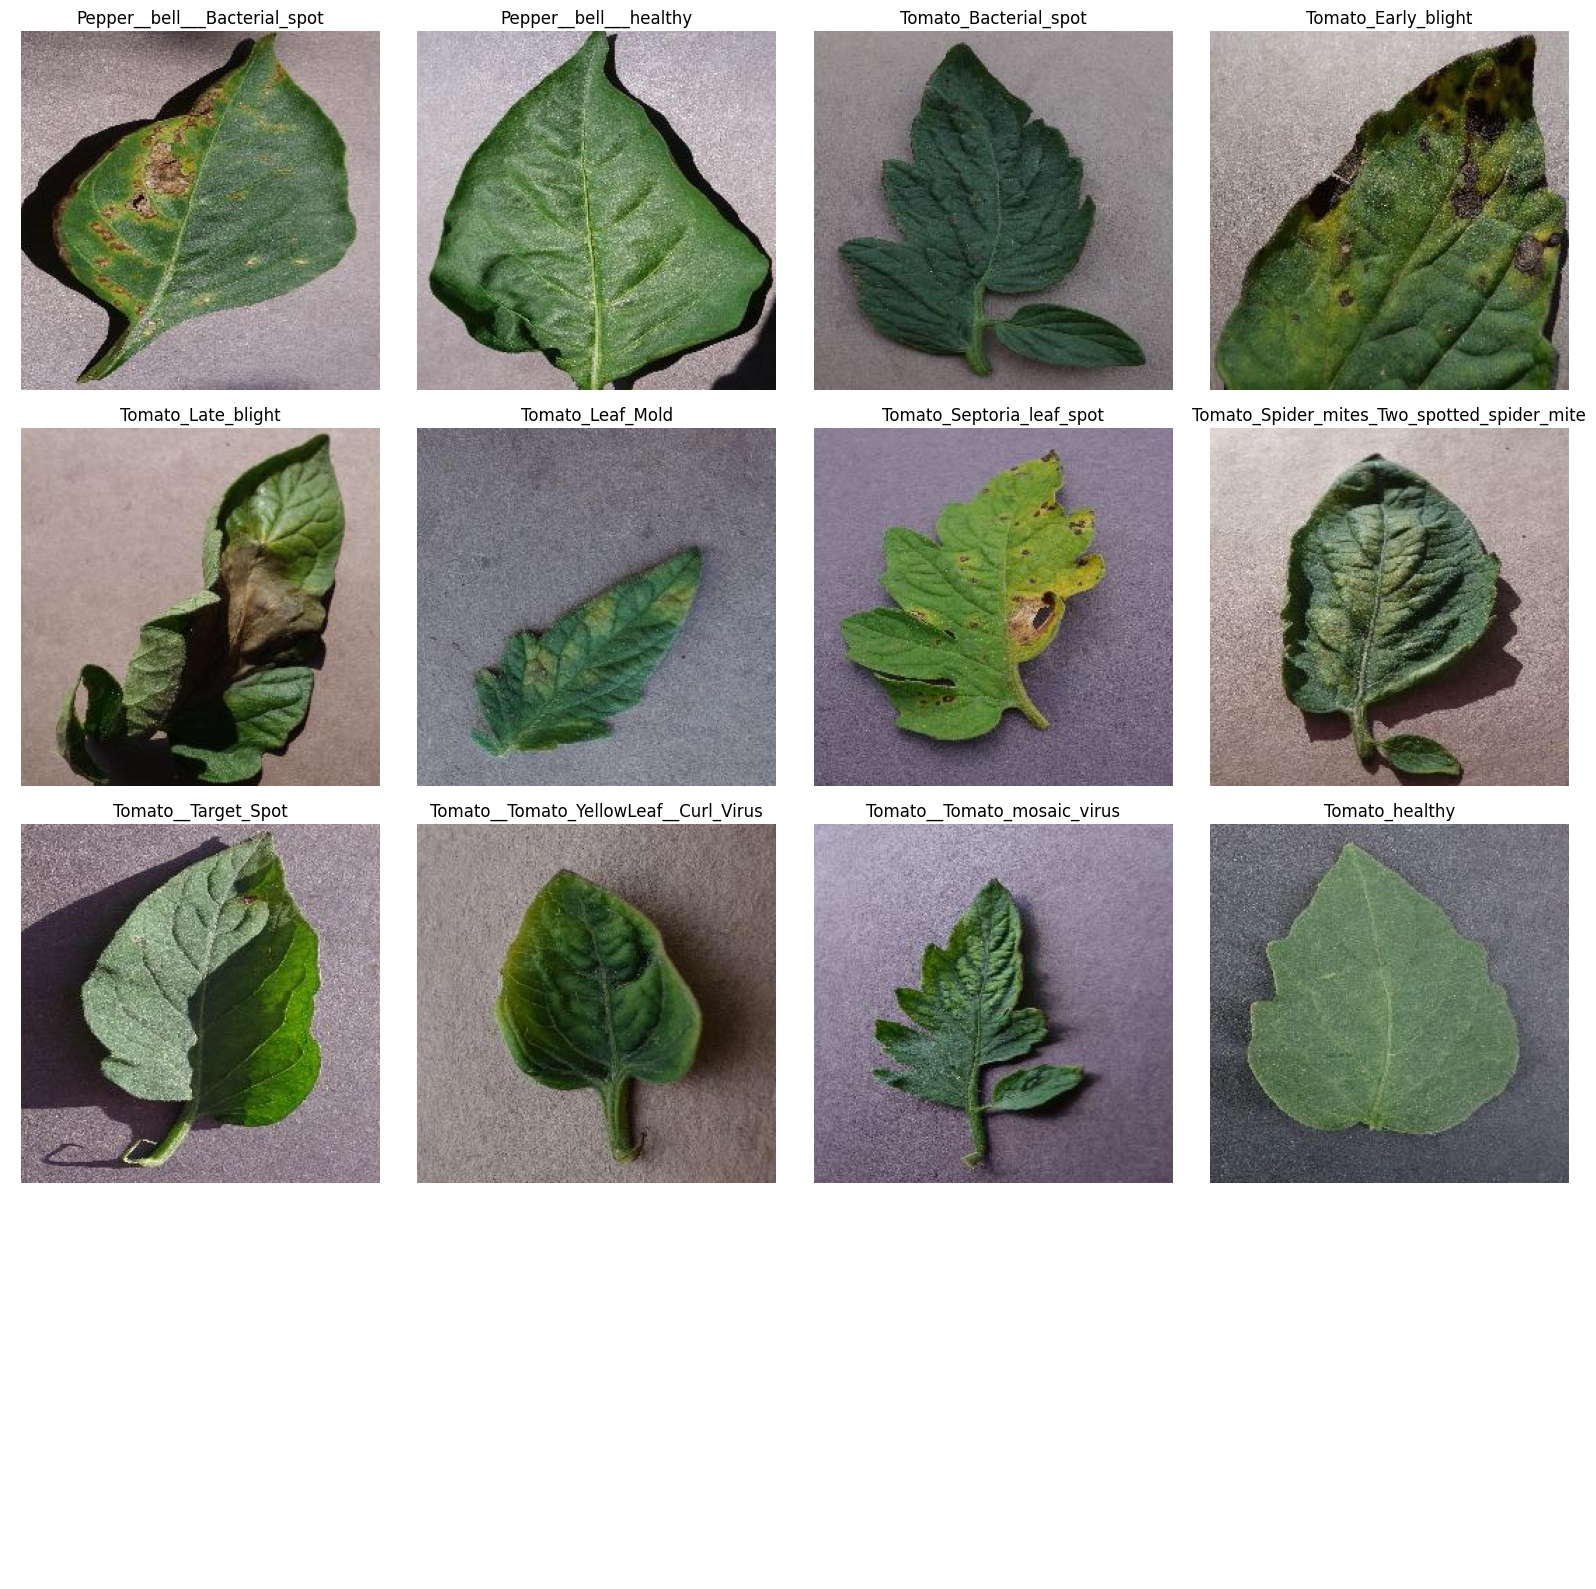

In [10]:
import os
import math
import matplotlib.pyplot as plt
from PIL import Image

root_dir = "D:\Project-to-learn\Agriculture_Potato_Disease_Classification\Data\Aftermake"
folders = sorted(os.listdir(root_dir))

num_classes = len(folders)

rows = cols = math.ceil(math.sqrt(num_classes))  # 3 x 3

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, folder in enumerate(folders):
    folder_path = os.path.join(root_dir, folder)
    image_files = os.listdir(folder_path)

    img_path = os.path.join(folder_path, image_files[0])
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].set_title(folder)
    axes[i].axis("off")

# Hide any extra axes (safety)
for j in range(num_classes, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [11]:
# 3. Split into train & val
from torch.utils.data import random_split
train_size = int(0.8 * len(Datasets))
val_size = len(Datasets) - train_size

train_dataset, val_dataset = random_split(Datasets, [train_size, val_size])

print("Training images:", len(train_dataset))
print("Validation images:", len(val_dataset))

# 4. Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

Training images: 14788
Validation images: 3698


In [12]:
train_dataset[0][0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [13]:
for X, y in train_loader:
    print(X.shape, y.shape)
    break


# torch.Size([32, 3, 224, 224]) torch.Size([32])
#torch.size([batch_size,channels,height,width])

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [14]:
# --- 5. Inspect a Batch (Optional) ---
# Let's see what the DataLoader gives us.
# next(iter(...)) gets one batch.
images, labels = next(iter(train_loader))

print(f"\n--- Inspecting one batch ---")
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels}")


--- Inspecting one batch ---
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])
Example labels: tensor([11,  9,  9,  3,  1,  2,  9, 10,  2,  0,  7,  9,  1,  1,  6,  1, 11,  7,
         9,  5,  4,  5,  4,  4,  1,  7,  8,  9,  3,  2,  1,  5])


In [15]:
# Classes: ['
# Pepper__bell___Bacterial_spot=0
# Pepper__bell___healthy = 1
# Tomato_Bacterial_spot =2 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [16]:
from collections import Counter

# Folder-wise image counts
labels = [label for _, label in train_dataset]
counter = Counter(labels)

for i, c in enumerate(classes):
    print(f"{c}: {counter[i]} images")


Pepper__bell___Bacterial_spot: 800 images
Pepper__bell___healthy: 1214 images
Tomato_Bacterial_spot: 1711 images
Tomato_Early_blight: 791 images
Tomato_Late_blight: 1518 images
Tomato_Leaf_Mold: 757 images
Tomato_Septoria_leaf_spot: 1429 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1322 images
Tomato__Target_Spot: 1125 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 2548 images
Tomato__Tomato_mosaic_virus: 307 images
Tomato_healthy: 1266 images


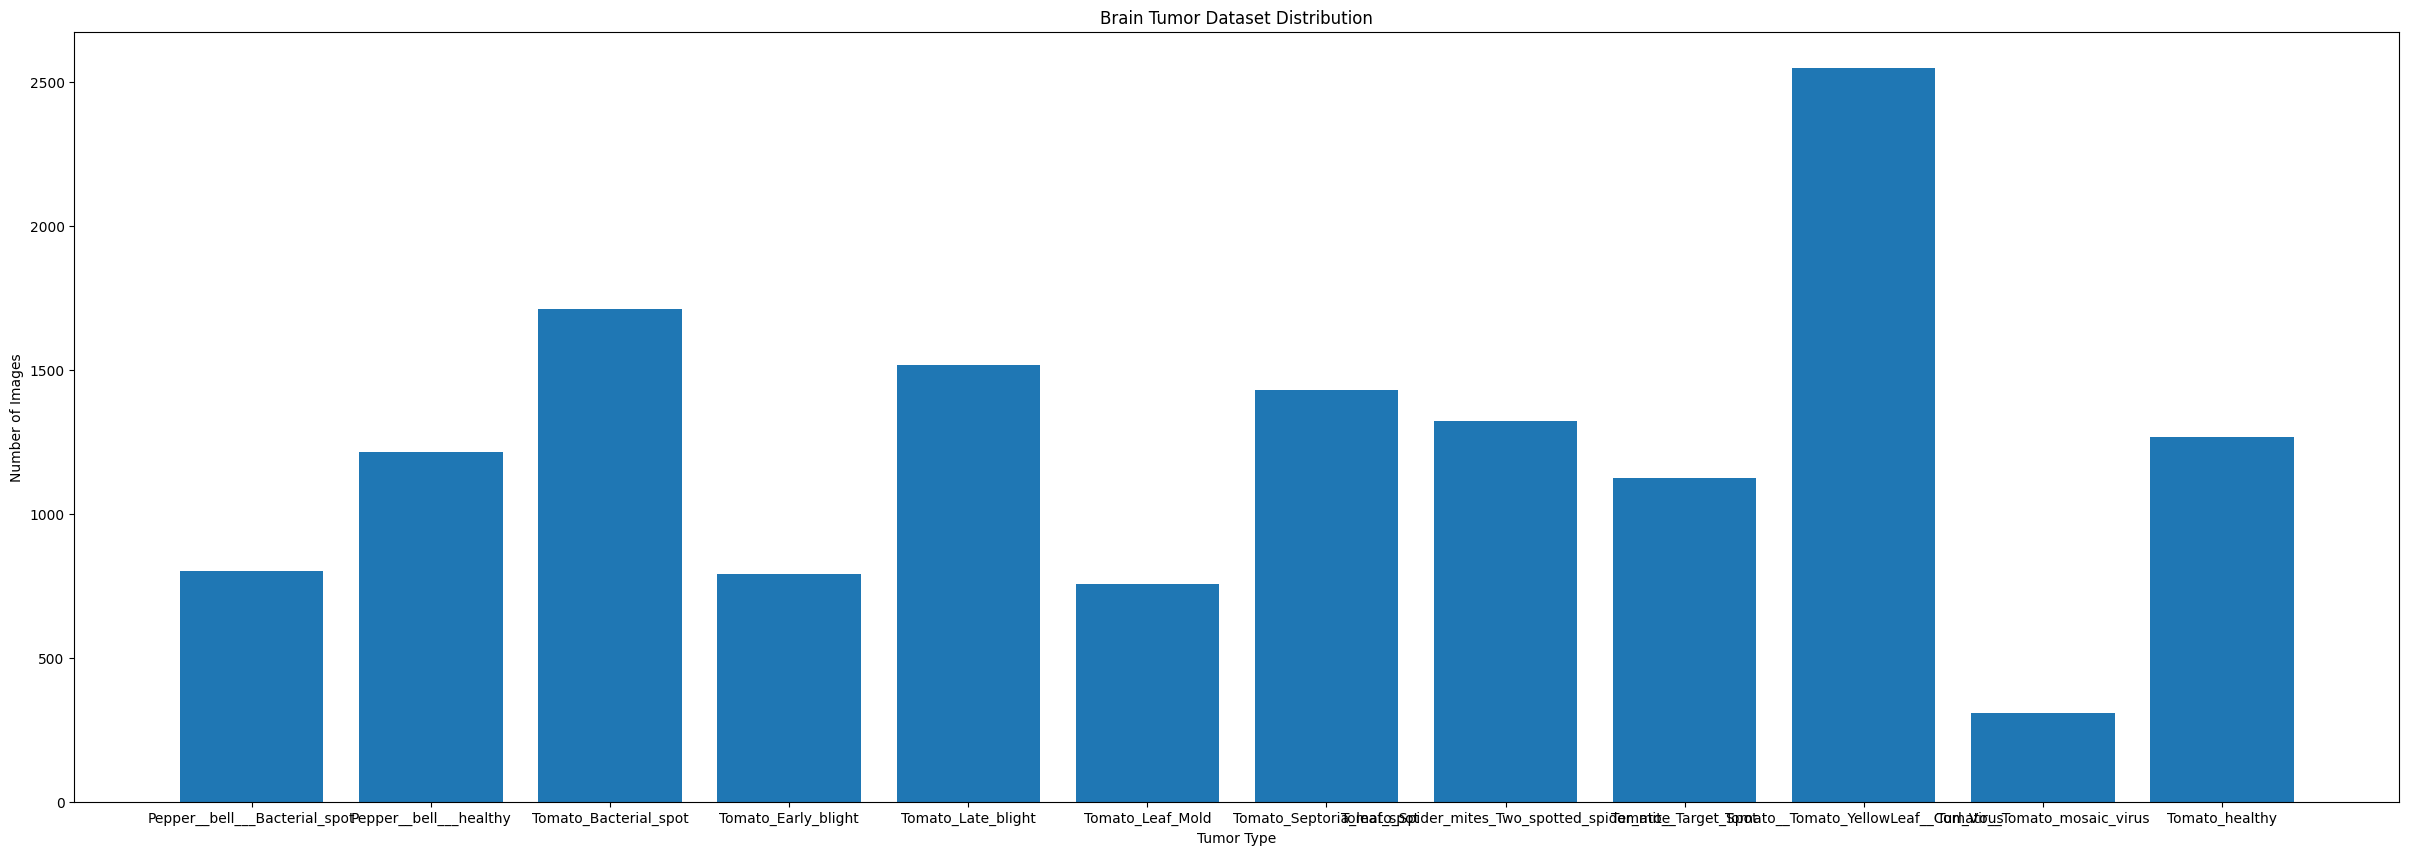

In [17]:
plt.figure(figsize=(30,10))
plt.bar(classes, [counter[i] for i in range(len(classes))])
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.title("Brain Tumor Dataset Distribution")
plt.show()


In [18]:
num_classes=len(classes)

In [19]:
from torchvision import models
import torch.nn as nn

model = models.resnet50(pretrained=True)


d:\Project-to-learn\Fine_Tuning_IN_Deep_learning\.finetu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Project-to-learn\Fine_Tuning_IN_Deep_learning\.finetu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
in_features = model.fc.in_features


In [21]:
model.fc = nn.Sequential(
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(64, num_classes)
)


In [22]:
print(model.fc)


Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=12, bias=True)
)


In [23]:
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
model = models.resnet50(pretrained=True)
in_features = model.fc.in_features


In [25]:
# ResNet50 ke liye
in_features = 2048


In [26]:
def build_classifier(in_features, num_classes):
    return nn.Sequential(
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, num_classes)
    )

model.fc = build_classifier(model.fc.in_features, num_classes)


In [27]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    model.fc.parameters(),
    lr=1e-3
)


In [28]:
model=model.to(device)

In [29]:
epochs = 10

In [30]:
criterion = nn.CrossEntropyLoss()   # correct for multi-class
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=2
)


epochs = 10
patience = 4
best_val_loss = float("inf")
counter = 0

from tqdm import tqdm
import time
from sklearn.metrics import classification_report

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    start_time = time.time()

    # ================= TRAINING =================
    model.train()
    total_epoch_loss = 0.0
    correct = 0
    total = 0

    for batch_features, batch_labels in tqdm(
        train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"
    ):
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        loss.backward()

        # Gradient clipping (stability)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    avg_train_loss = total_epoch_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)

    # ================= VALIDATION =================
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for val_features, val_labels in tqdm(
            val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]"
        ):
            val_features = val_features.to(device)
            val_labels = val_labels.to(device)

            val_outputs = model(val_features)
            v_loss = criterion(val_outputs, val_labels)

            val_loss += v_loss.item()

            _, v_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (v_predicted == val_labels).sum().item()

            all_preds.extend(v_predicted.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    val_loss_list.append(avg_val_loss)
    val_acc_list.append(val_accuracy)

    # Scheduler step
    scheduler.step(avg_val_loss)

    # ================= EARLY STOPPING =================
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1

    epoch_time = time.time() - start_time

    # ================= LOGGING =================
    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"- Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% "
        f"- Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}% "
        f"- Time: {epoch_time:.2f}s"
    )

    if counter >= patience:
        print("Early stopping triggered")
        break
# ================= FINAL EVALUATION =================
print("\nClassification Report (Validation Set):")
print(classification_report(all_labels, all_preds, target_names=classes))


Epoch 1/10 [Val]: 100%|██████████| 116/116 [00:49<00:00,  2.34it/s]


Epoch [1/10] - Train Loss: 0.6509, Train Acc: 79.08% - Val Loss: 0.3428, Val Acc: 89.35% - Time: 290.55s


Epoch 2/10 [Val]: 100%|██████████| 116/116 [00:19<00:00,  6.03it/s]


Epoch [2/10] - Train Loss: 0.3292, Train Acc: 89.83% - Val Loss: 0.1903, Val Acc: 93.19% - Time: 141.23s


Epoch 3/10 [Val]: 100%|██████████| 116/116 [00:15<00:00,  7.31it/s]


Epoch [3/10] - Train Loss: 0.2357, Train Acc: 92.70% - Val Loss: 0.2476, Val Acc: 92.73% - Time: 138.01s


Epoch 4/10 [Val]: 100%|██████████| 116/116 [00:15<00:00,  7.52it/s]


Epoch [4/10] - Train Loss: 0.1845, Train Acc: 94.27% - Val Loss: 0.1326, Val Acc: 95.84% - Time: 143.64s


Epoch 5/10 [Val]: 100%|██████████| 116/116 [00:21<00:00,  5.34it/s]


Epoch [5/10] - Train Loss: 0.1513, Train Acc: 95.24% - Val Loss: 0.1859, Val Acc: 94.02% - Time: 147.38s


Epoch 6/10 [Val]: 100%|██████████| 116/116 [00:20<00:00,  5.64it/s]


Epoch [6/10] - Train Loss: 0.1246, Train Acc: 96.02% - Val Loss: 0.1829, Val Acc: 94.97% - Time: 154.05s


Epoch 7/10 [Val]: 100%|██████████| 116/116 [00:15<00:00,  7.54it/s]


Epoch [7/10] - Train Loss: 0.1245, Train Acc: 96.19% - Val Loss: 0.1952, Val Acc: 94.62% - Time: 140.33s


Epoch 8/10 [Val]: 100%|██████████| 116/116 [00:21<00:00,  5.31it/s]


Epoch [8/10] - Train Loss: 0.0608, Train Acc: 98.24% - Val Loss: 0.0327, Val Acc: 98.97% - Time: 159.31s


Epoch 9/10 [Val]: 100%|██████████| 116/116 [00:15<00:00,  7.44it/s]


Epoch [9/10] - Train Loss: 0.0434, Train Acc: 98.63% - Val Loss: 0.0527, Val Acc: 98.32% - Time: 151.27s


Epoch 10/10 [Val]: 100%|██████████| 116/116 [00:19<00:00,  6.10it/s]

Epoch [10/10] - Train Loss: 0.0453, Train Acc: 98.46% - Val Loss: 0.0374, Val Acc: 98.84% - Time: 158.12s

Classification Report (Validation Set):
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.98      0.99      0.98       197
                     Pepper__bell___healthy       0.99      1.00      1.00       264
                      Tomato_Bacterial_spot       1.00      0.99      0.99       416
                        Tomato_Early_blight       0.98      0.96      0.97       209
                         Tomato_Late_blight       0.98      0.99      0.99       391
                           Tomato_Leaf_Mold       0.96      1.00      0.98       195
                  Tomato_Septoria_leaf_spot       0.99      0.97      0.98       342
Tomato_Spider_mites_Two_spotted_spider_mite       0.98      1.00      0.99       354
                        Tomato__Target_Spot       0.99      0.96      0.98       279
  

In [31]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in val_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 98.6749594375338


In [33]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in train_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 99.24939139843116


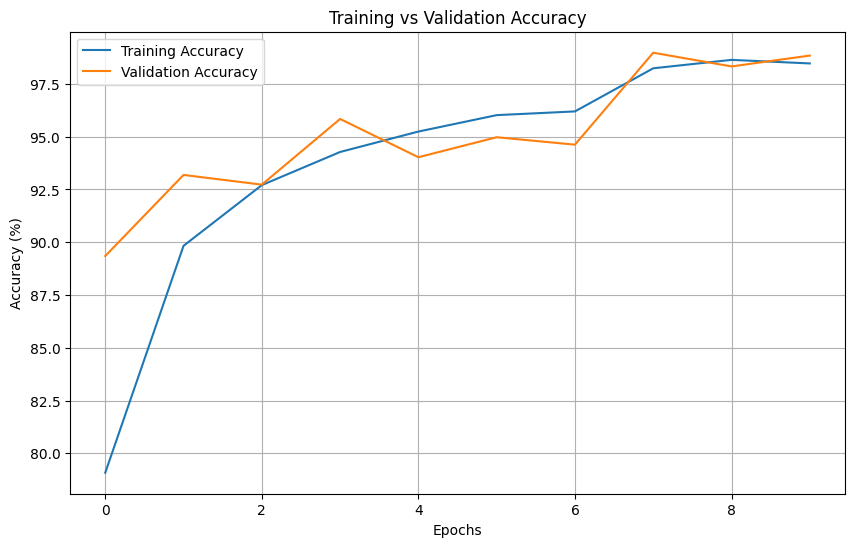

In [34]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

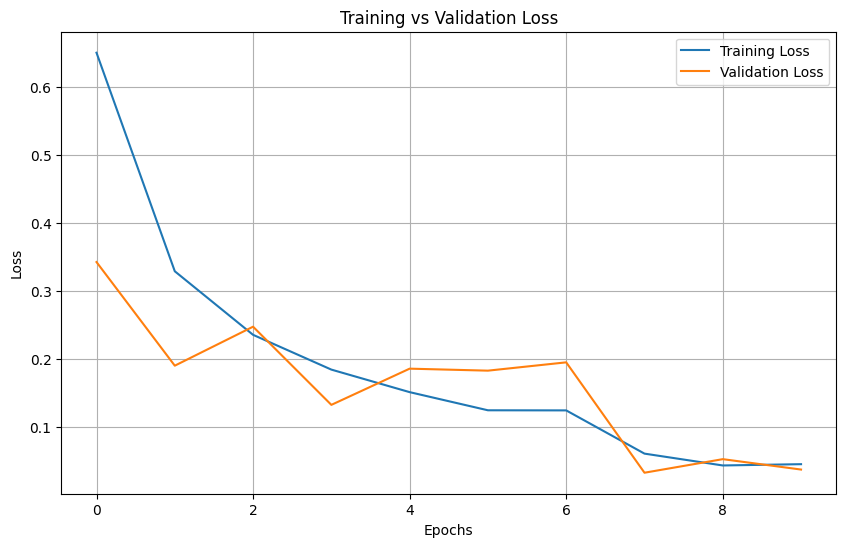

In [35]:
plt.figure(figsize=(10,6))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [40]:
# model = CNN(len(classes))                      # your CNN class
model.load_state_dict(torch.load("kisan_model.pth", map_location="cpu"))
model.eval()   

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
# torch.save(model.state_dict(), "kisan_model.pth")

In [37]:
# Prediction function
def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    print(f"\n🧠 Predicted : {classes[predicted.item()]}")
    return classes[predicted.item()]

In [42]:
predict(r"d:\Project-to-learn\Agriculture_Potato_Disease_Classification\Data\Aftermake\Tomato_Bacterial_spot\0a64655c-4052-4e5f-a696-2a6cf25d10c9___GCREC_Bact.Sp 6017.JPG")

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor